<a href="https://colab.research.google.com/github/gemme/resnet18/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [110]:
# dataset_path = keras.utils.get_file('cancer.csv', 'https://github.com/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/blob/master/DataSets/cancer.csv')
column_names = ["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit","Class"]
_URL = 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/master/DataSets/cancer.csv'
raw_dataset = pd.read_csv( _URL,names=column_names, na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True, header=0)
dataset = raw_dataset.copy()
dataset 


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,1
679,2,1,1,1,2,1,1,1,1,1
680,5,10,10,3,7,3,8,10,2,0
681,4,8,6,4,3,4,10,6,1,0


In [114]:
dataset.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [84]:

dataset.isna().sum()


Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [85]:

dataset = dataset.dropna()

In [111]:

x = np.asanyarray(dataset.drop(columns=['Class']))
y = np.asanyarray(dataset[['Class']])
x = StandardScaler().fit_transform(x)
print(x.shape)
print(y.shape)
     

(683, 9)
(683, 1)


In [112]:
x[:5]

array([[ 0.19790469, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299,  0.75803177,  1.69516613,
         1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [ 0.55267873,  1.58320366,  1.6021918 , -0.63936553, -0.10545357,
         0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362,  0.05933312, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [113]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [104]:

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

In [139]:
def build_model():

  model = keras.Sequential()
  model.add(keras.layers.Dense(128, kernel_initializer='glorot_uniform', 
                               activation='relu', input_shape=[x.shape[1]]))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam())
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return  model

In [140]:

model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               1280      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [141]:
# es = keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=20)
history = model.fit(xtrain, ytrain,
                    batch_size=64, epochs=100, 
                    validation_split=0.2, verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 0.5941 - accuracy: 0.7041 - val_loss: 0.4838 - val_accuracy: 0.8364
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4547 - accuracy: 0.8417 - val_loss: 0.3685 - val_accuracy: 0.8909
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3955 - accuracy: 0.8601 - val_loss: 0.3118 - val_accuracy: 0.9091
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3436 - accuracy: 0.8876 - val_loss: 0.2766 - val_accuracy: 0.9364
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3034 - accuracy: 0.9060 - val_loss: 0.2468 - val_accuracy: 0.9364
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.9197 - val_loss: 0.2322 - val_accuracy: 0.9364
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2625 - accuracy: 0.9174 - val_loss: 0.2135 - val_accuracy: 0.9364
Epoch 8/100
7/7 [=========

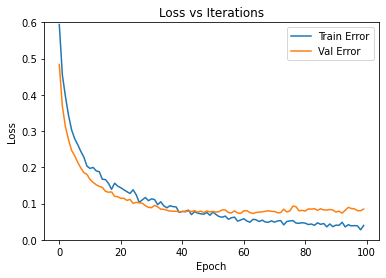

In [143]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.title('Loss vs Iterations')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,.6])
  plt.legend()

plot_history(history)

In [145]:
score = model.evaluate(xtest, ytest)

5/5 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9781
